### Usage example: Dynamic functional connectivity

Required comet modules are:

* comet.connectivity (contains all dFC methods)
* comet.data (contains example data)
* comet.gui (allows GUI interaction within a script)

The example data is of shape (1040, 10), which corresponds to 1040 time points and 10 brain regions.
All connectivity methods require time to be the first dimension in the time series.

In [1]:
from comet import connectivity, data, gui

ts = data.load_example()
print(ts.shape)

(1040, 10)


dFC can then be estimated with any of the included methods:

In [2]:
import numpy as np
from nilearn import datasets

# Preprocessed time series data from the ABIDE dataset
subject = 50010
data = datasets.fetch_abide_pcp(SUB_ID=subject, pipeline='cpac', band_pass_filtering=True, derivatives="rois_dosenbach160", legacy_format=False)
ts = data.rois_dosenbach160[0]

jc = connectivity.Jackknife(ts, windowsize=11)
dfc_jc = jc.estimate()
print(f"JC dFC has shape: {dfc_jc.shape}")

Calculating Jackknife Correlation, please wait...
JC dFC has shape: (161, 161, 186)
GUI closed with status 0


Other examples:

Calculating Sliding Window Correlation, please wait...
Calculating Flexible Least Squares, please wait...


100%|██████████| 161/161 [00:14<00:00, 11.50it/s]


FLS dFC has shape: (161, 161, 196)


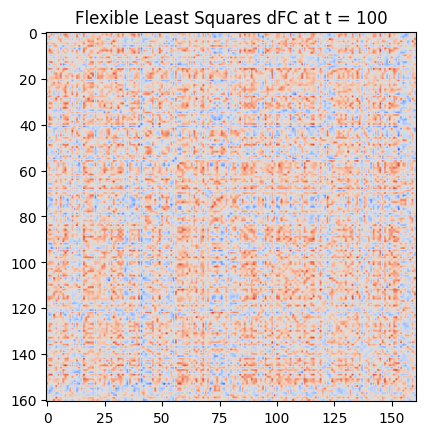

In [3]:
# Tapered sliding window
tsw = connectivity.SlidingWindow(ts, windowsize=21, shape="gaussian", std=7)
dfc_tsw = tsw.estimate()

# Flexible Least Squares
fls = connectivity.FlexibleLeastSquares(ts, mu=100)
dfc_fls = fls.estimate()
print(f"FLS dFC has shape: {dfc_fls.shape}")

from matplotlib import pyplot as plt
plt.imshow(dfc_fls[:,:,100], cmap="coolwarm", vmin=-1, vmax=1);
plt.title("Flexible Least Squares dFC at t = 100");

Methods relying on windowing also contain a centers() method, which returns the corresponding BOLD time series indices of the dFC data: 

In [4]:
# Tapered sliding window
tsw = connectivity.SlidingWindow(ts, windowsize=45, stepsize=10, shape="gaussian", std=7)
dfc_tsw = tsw.estimate()
centers_tsw = tsw.centers()

print("Number of BOLD time points:", ts.shape[0])
print("Number of dFC estimates:", dfc_tsw.shape[2])
print("Centers of the sliding window (in BOLD time points):", centers_tsw)


Calculating Sliding Window Correlation, please wait...
Number of BOLD time points: 196
Number of dFC estimates: 16
Centers of the sliding window (in BOLD time points): [ 22  32  42  52  62  72  82  92 102 112 122 132 142 152 162 172]
